#**Digit Prediction from Recorded Speech Audio**

We are going to use audio files that record different speakers saying numerical digits. This type of NN could be useful for detecting spoken digits in an audio-based customer service setting with a voice-based chatbot. First, we need to download the data.

In [1]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4243, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 4243 (delta 16), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4243/4243), 30.38 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (120/120), done.


Here is what the files look like... 

In [2]:
!ls free-spoken-digit-dataset/recordings/

0_george_0.wav	   2_nicolas_0.wav    5_george_0.wav	 7_nicolas_0.wav
0_george_10.wav    2_nicolas_10.wav   5_george_10.wav	 7_nicolas_10.wav
0_george_11.wav    2_nicolas_11.wav   5_george_11.wav	 7_nicolas_11.wav
0_george_12.wav    2_nicolas_12.wav   5_george_12.wav	 7_nicolas_12.wav
0_george_13.wav    2_nicolas_13.wav   5_george_13.wav	 7_nicolas_13.wav
0_george_14.wav    2_nicolas_14.wav   5_george_14.wav	 7_nicolas_14.wav
0_george_15.wav    2_nicolas_15.wav   5_george_15.wav	 7_nicolas_15.wav
0_george_16.wav    2_nicolas_16.wav   5_george_16.wav	 7_nicolas_16.wav
0_george_17.wav    2_nicolas_17.wav   5_george_17.wav	 7_nicolas_17.wav
0_george_18.wav    2_nicolas_18.wav   5_george_18.wav	 7_nicolas_18.wav
0_george_19.wav    2_nicolas_19.wav   5_george_19.wav	 7_nicolas_19.wav
0_george_1.wav	   2_nicolas_1.wav    5_george_1.wav	 7_nicolas_1.wav
0_george_20.wav    2_nicolas_20.wav   5_george_20.wav	 7_nicolas_20.wav
0_george_21.wav    2_nicolas_21.wav   5_george_21.wav	 7_nicolas_21.wa

We can play one of these files to hear what it sounds like... this person is saying the digit 'zero'.

In [3]:
!pip install librosa==0.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 106.3 MB/s eta 0:00:00
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201393 sha256=45398a3e07bd4a4ff96aaefc8d43815844a3a2a4222016f575380d07eae68fa2
  Stored in directory: /root/.cache/pip/wheels/a4/09/cc/728ed681f0fa5c37e0fbfc66d2ba07058dd995784f1f6554a8
Successfully built librosa
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


free-spoken-digit-dataset/recordings/2_theo_16.wav


Total Duration: 0.4825 seconds.


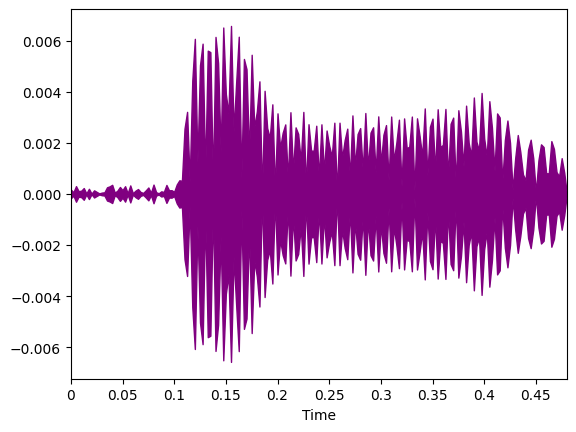

In [4]:
from IPython.display import Audio
from IPython.display import display
import glob
import librosa.display
import librosa
   
basePath = 'free-spoken-digit-dataset/recordings'

for i,file in enumerate(glob.glob(f"{basePath}/*.wav")):
  
  # What's the name of the file? 
  sound_file = f'{file}'
  print(sound_file)

  # Play the audio file.
  wn = Audio(sound_file, autoplay=True) ##
  display(wn)

  # Draw the waveform plot of the audio signal.
  y,sr=librosa.load(sound_file, sr=400) # I am going to be downsampling these files from 8kHz to 400Hz.
  librosa.display.waveplot(y,sr=sr, x_axis='time', color='purple',offset=0.0)

  # Write out how long the file is in seconds.
  print(f'Total Duration: {librosa.get_duration(y=y,sr=sr)} seconds.')

  break

What does .wav data actually look like?

In [5]:
from scipy.io import wavfile

sampling_rate, data = wavfile.read(sound_file) 
print(f'Song is originally sampled at {sampling_rate} times per second.')
print(f'The first file contains a total of {len(data)} samples, thus the song length is {len(data)/sampling_rate} seconds.')
print(f'Here are the first 15 samples of that first recording...{data[:15]}.')

Song is originally sampled at 8000 times per second.
The first file contains a total of 3850 samples, thus the song length is 0.48125 seconds.
Here are the first 15 samples of that first recording...[-10  -3  -7  -3  -3  -4  -2 -16  -3  -8 -13   0  -8  -6  -7].


#*Prepare Our Data*



For each song, let's convert it into numeric sequences, and construct its label from the file name.


In [6]:
from pathlib import Path
from scipy.signal import decimate

downsample_factor = 8

def processSong(song):
  
  filename = Path(song).stem
  label = int(filename[0])

  sampling_rate, data = wavfile.read(song)
  return label,sampling_rate,data

labels = []
sample_rates = []
sequences = []

for i,file in enumerate(glob.glob(f"{basePath}/*.wav")):
  label, sample_rate, sequence = processSong(file)
  labels.append(label)
  sample_rates.append(sample_rate/downsample_factor)

  sequence = decimate(sequence,downsample_factor) 

  sequences.append(sequence)

sequences[0]

array([-7.50984134e+00, -9.85918789e+00,  2.43864699e+00, -6.24402178e+00,
        1.33192342e+01,  4.32673973e+01, -3.09684194e+01, -1.73586939e+01,
        3.91377244e+01, -1.67847372e+01, -1.76817975e+01, -4.07243989e+00,
       -2.85662121e+00,  1.05227059e+01, -3.58088322e+01,  1.45120235e+01,
        2.13697390e+01, -2.19353688e+01,  2.54507554e+01, -8.24970329e+00,
        3.57592443e+00,  1.19421241e+01, -2.08620465e+01,  1.94103552e+01,
        3.71713477e+00, -7.36357659e+00, -5.76704842e-01, -5.16363836e+00,
        6.50926605e-01,  5.97595893e+00,  8.23988078e+00, -4.49503671e+00,
       -4.87606804e+00, -1.41041291e+01,  1.58119539e+01, -2.75470133e-01,
       -4.32212827e+01,  1.85449964e+00, -2.74721276e+00,  6.53300327e+00,
        1.49653178e+01, -1.07123571e+01,  2.18388057e+01, -4.78402750e+00,
       -1.55590977e+01,  1.85047927e+01,  4.25370704e-01,  1.41772215e+01,
        8.08742815e+00, -7.81964144e+00,  3.61186992e+00, -7.50325104e+00,
        5.21688730e+00,  

All songs have been 'downsampled'. We have ragged lists of numeric values that we need to pad.

In [7]:
for i in range(3):
  print(f'Recording {i} has a sampling rate of {sample_rates[i]}, and it is {len(sequences[i])} elements long.')

Recording 0 has a sampling rate of 1000.0, and it is 482 elements long.
Recording 1 has a sampling rate of 1000.0, and it is 435 elements long.
Recording 2 has a sampling rate of 1000.0, and it is 279 elements long.


Here we will make an array of 0's and fill in our audio sequences from the left. The longest sequence is an outlier, so we will truncate some recordings. We also then shuffle the sequences. Be careful to ensure you do this, because the original files are alphabetical! They are grouped by the name of the speaker. 


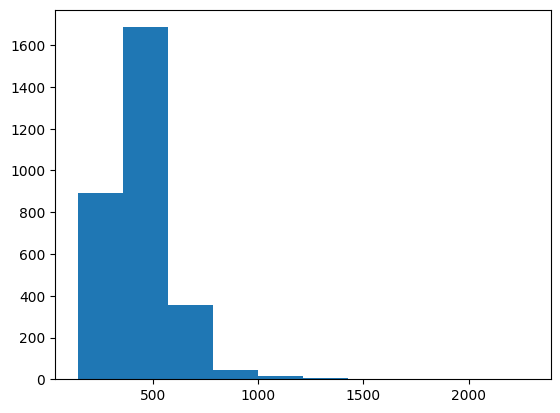

The longest list is 2283 long, but most lists are much shorter.
(3000, 700)


In [8]:
import tensorflow as tf
import numpy as np
import statistics
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler

len_lists = [len(x) for x in sequences]
plt.hist(len_lists)
plt.show()
print(f'The longest list is {max(len_lists)} long, but most lists are much shorter.')

# We can pad the sequences to have a common length (and chop off the end of really long ones)
labels = np.stack(labels)

# Be careful with this pad sequences function! By default it pads at the front...
# If you pad the wrong end and then truncate that can have a huge impact on model accuracy (e.g., 10%)
padded_sequences = pad_sequences(sequences, maxlen=700,padding="post")  

# We might use a min-max scaler here to whiten our data. Note that audio data is already generally centered around 0 though! So, it's not that important. 
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = scaler.fit(padded_sequences)
#padded_sequences = scaler.transform(padded_sequences)

# Shuffling observations, because certain voices come earlier in the file system, and others later.
shuffled_indices= np.arange(padded_sequences.shape[0])
np.random.shuffle(shuffled_indices)
padded_sequences = padded_sequences[shuffled_indices,:]
labels = labels[shuffled_indices]

print(padded_sequences.shape)

In [ ]:
padded_sequences[0]

array([-1101,   173,   -97,    97,   -87,   142,  -117,    70,    10,
        -148,   140,   -34,    35,   -47,    67,   -63,   -27,    83,
        -130,   125,    27,  -133,    72,    33,   -65,    39,    -4,
         -57,    70,   -47,    27,    75,  -120,    75,   -19,   -74,
         103,   -73,    24,    71,   -67,   -14,    32,   -26,    -2,
          47,   -55,    23,     1,    -3,    31,   -35,     3,   -12,
          41,   -26,   -10,    49,   -45,    27,   -40,   -14,    46,
         -37,    51,     9,   -68,    45,    20,  -100,   104,    -5,
         -95,   128,   -91,     9,    46,   -27,    29,   -82,    73,
         -53,    34,    49,   -97,    82,   -74,    17,    44,   -28,
          17,   -12,     1,    10,     9,   -74,    77,   -25,   -49,
         105,   -70,    14,    28,   -53,    25,     8,   -27,     5,
          38,   -40,   -12,    69,   -46,   -32,    70,   -24,   -23,
          44,   -40,   -35,    78,   -37,   -29,    72,   -79,    41,
          12,   -42,

#*Temporal (1D) Convolutions*

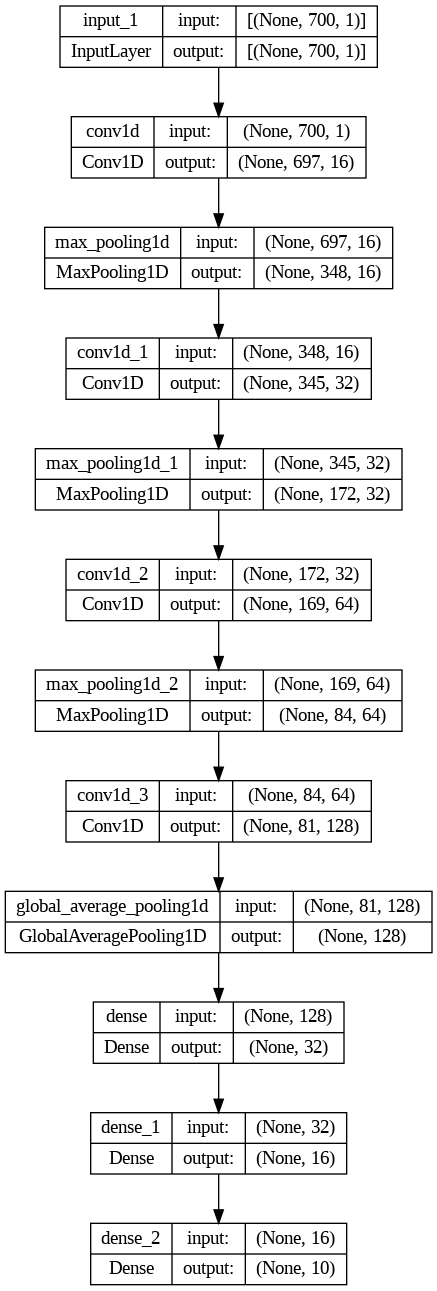

In [9]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(padded_sequences.shape[1], 1))
x = layers.Conv1D(16, 4, activation="relu")(inputs) # 1D Convolution with 16 channels / filters, and a window length of 4 (kernel size). Stride here is 1, no padding. 
x = layers.MaxPooling1D(2)(x) # Then we apply max pooling, with window of 2 (and stride of 2)
x = layers.Conv1D(32, 4, activation="relu")(x) # Then 32 filters, window of 4. 
x = layers.MaxPooling1D(2)(x) # Pool by blocks of two values in each sequence (again, means we attempt to divide sequence length in half)
x = layers.Conv1D(64, 4, activation="relu")(x) # 64 filters, with sequence length of 4.
x = layers.MaxPooling1D(2)(x) # Pool by blocks of two values in each sequence (again, means we attempt to divide sequence length in half)
x = layers.Conv1D(128, 4, activation="relu")(x) # 128 filters, with sequence length of 4.
x = layers.GlobalAveragePooling1D()(x) # We apply global average pooling to the resulting 128 feature maps (i.e., what high level patterns were more or less present across the series)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(32,activation="relu")(x)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(16,activation="relu")(x)
outputs = layers.Dense(10,activation="softmax")(x) # Linear activation output.
model = keras.Model(inputs, outputs)
  
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
keras.utils.plot_model(model,show_shapes=True)

Let's try fitting this model... 

In [10]:
# We are making a different callback so we don't overwrite our last model (we might want to compare them)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="audio_conv.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(padded_sequences,labels,validation_split=0.2,batch_size=25,epochs=200,callbacks=callbacks)

Epoch 1/200
96/96 [==============================] - 12s 7ms/step - loss: 5.9413 - sparse_categorical_accuracy: 0.1112 - val_loss: 2.3005 - val_sparse_categorical_accuracy: 0.1133
Epoch 2/200
96/96 [==============================] - 0s 5ms/step - loss: 2.3044 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.0967
Epoch 3/200
96/96 [==============================] - 0s 5ms/step - loss: 2.3019 - sparse_categorical_accuracy: 0.1029 - val_loss: 2.2977 - val_sparse_categorical_accuracy: 0.0900
Epoch 4/200
96/96 [==============================] - 0s 5ms/step - loss: 2.3019 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.2944 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/200
96/96 [==============================] - 0s 4ms/step - loss: 2.2898 - sparse_categorical_accuracy: 0.1100 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0967
Epoch 6/200
96/96 [==============================] - 0s 5ms/step - loss: 2.3020 - sparse_categorical_acc

If we plot model accuracy over training... we get up to nearly 80% accuracy in the validation data. Not bad! We could probably do better if we kept playing with the model.

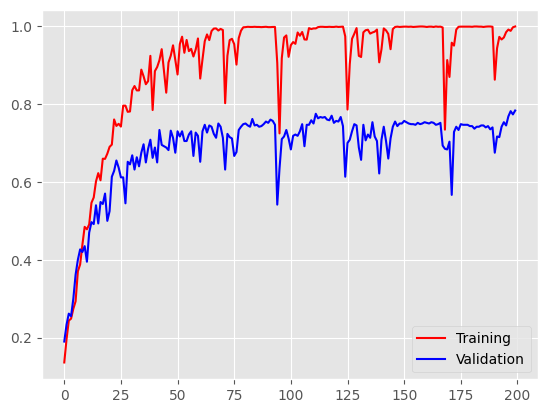

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(history.history['sparse_categorical_accuracy'],c="r")
plt.plot(history.history['val_sparse_categorical_accuracy'],c="b")
plt.legend(['Training','Validation'])
plt.show()

#*Now Let's Try LSTM*

These sequences are quite long, so you'll find that the LSTM trains very slowly, unless you use very large batches. This is limiting, because learning might improve with smaller batch sizes. One thing you can do instead is use a low-level optimized version of LSTM, which works more efficiently on the GPU. It doesn't allow you to apply masking, unfortunately, but it runs much quicker. We can try it out.

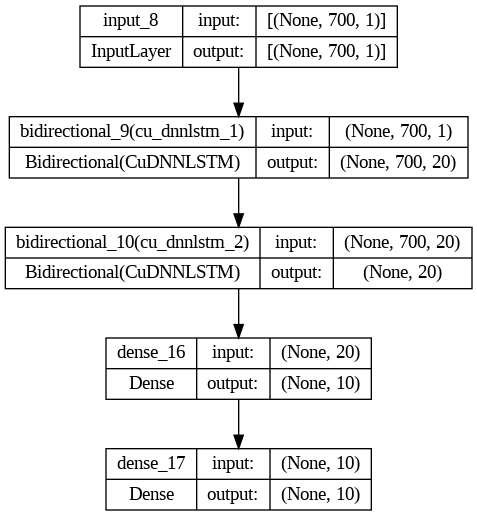

In [ ]:
from tensorflow import keras
from keras import layers

input = keras.Input(shape=(padded_sequences.shape[1],1)) 

# Note: We shouldn't use BatchNormalization() with sequence data, because it is not effective / can be harmful. 
# Layer normalization is a better alternative; it normalizes values in a sequence on a per-sequence basis (rather than across sequences in the batch).
# There is a tensorflow add-on (tfa library) layer that provides an LSTM layer that incorporates layer-normalization, if you want to try it out.

# When we say "return_sequences=True", this LSTM returns transformations of the sequence (rather than a compressed representation)
# Each LSTM unit will push the sequence of 700 values through a series of recurring LSTM calculations, so we will get 10 new sequences from the original 1.
# The layer is bi-directional, so we get 2* the number of LSTM outputs, one in each direction, concatenated together, so actually get 20 versions of the original 700-value input.
x = layers.Bidirectional(layers.CuDNNLSTM(units=10,return_sequences=True))(input)

# In the next layer we do *not* return the full sequences. 
# Instead, each LSTM unit will produce a compressed representation of the input sequences. 
# Given we have 10 LSTM units, bidirectional, we get a 20-value embedding of all those input sequences.
x = layers.Bidirectional(layers.CuDNNLSTM(units=10))(x) 

# Lastly I'm passing that to a couple of Dense layers that can figure out how to mix and match and recombine the embedding.
# Add some dropout so it doesn't start to overfit immediately
x = layers.Dense(10, activation="relu")(x)

#x = layers.Dropout(0.3)(x)
#x = layers.Dense(10, activation="relu")(x)
#x = layers.Dropout(0.3)(x)

# Finally, we pass the result to a 10-digit softmax output.
output = layers.Dense(10,activation="softmax")(x)

model = keras.Model(inputs=input,outputs=output)

model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])

keras.utils.plot_model(model,show_shapes=True)

Let's try fitting this model... this approach alone (of learning compressed representations, i.e., embeddings, of the audio sequence) is sufficient to get us to 50% accuracy in our classification task. That's impressive, or it's not, depending on how you think about it. 

In [ ]:
# We are making a different callback so we don't overwrite our last model (we might want to compare them)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="audio_digits.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(padded_sequences,labels,validation_split=0.2,batch_size=25,epochs=250,callbacks=callbacks)

Epoch 1/250
96/96 [==============================] - 12s 71ms/step - loss: 2.3022 - sparse_categorical_accuracy: 0.0954 - val_loss: 2.3020 - val_sparse_categorical_accuracy: 0.0967
Epoch 2/250
96/96 [==============================] - 6s 66ms/step - loss: 2.2926 - sparse_categorical_accuracy: 0.1088 - val_loss: 2.2901 - val_sparse_categorical_accuracy: 0.1250
Epoch 3/250
96/96 [==============================] - 6s 66ms/step - loss: 2.2774 - sparse_categorical_accuracy: 0.1150 - val_loss: 2.2708 - val_sparse_categorical_accuracy: 0.1217
Epoch 4/250
96/96 [==============================] - 6s 66ms/step - loss: 2.2542 - sparse_categorical_accuracy: 0.1342 - val_loss: 2.2322 - val_sparse_categorical_accuracy: 0.1283
Epoch 5/250
96/96 [==============================] - 6s 67ms/step - loss: 2.2302 - sparse_categorical_accuracy: 0.1513 - val_loss: 2.2125 - val_sparse_categorical_accuracy: 0.1400
Epoch 6/250
96/96 [==============================] - 6s 66ms/step - loss: 2.2079 - sparse_categoric

Plot loss and accuracy over training... the model is up to 50% accuracy and has not peaked yet. But, you can already see that a 1D convolution is much faster and easier to train. In generally, 1D Convolutions tend to be easier to work with when you have lists of fixed length (as in this case with padding).

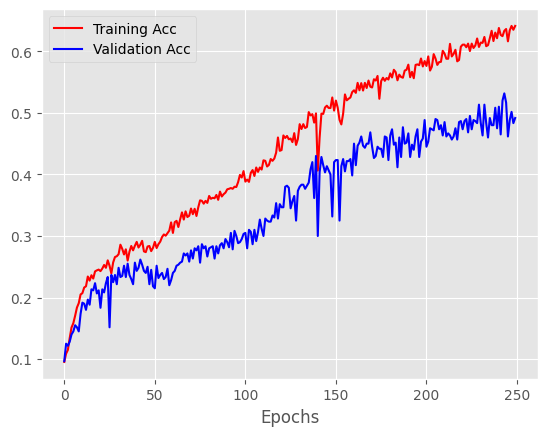

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(history.history['sparse_categorical_accuracy'],c="r")
plt.plot(history.history['val_sparse_categorical_accuracy'],c='b')
plt.xlabel("Epochs")
plt.legend(['Training Acc','Validation Acc'])
plt.show()